# Principal Component Analysis

Find the principal components of handwritten digits using PCA. Note that in practice,
PCA is unsupervised and therefore we should not use the labels (or do
not have the labels). However, if we want to visualize the projected vectors of different
digits on the eigenspace, we may need the labels. 

<font color='blue'>Step 11</font>

In [1]:
# Mount Google drive and cd to working folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/Learning/EIE4105/lab2/python/

Mounted at /content/drive
/content/drive/My Drive/Learning/EIE4105/lab2/python


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# loading the data
from mnist import load_mnist
trainpath = '../../lab1/data/noisy_train_digits.mat'
testpath = '../../lab1/data/noisy_test_digits.mat'
train_data, train_labels, test_data, test_labels= load_mnist(trainpath,testpath)
print(train_data.shape)

(60000, 784)


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=train_data.shape[1])
pca.fit(train_data)
print(pca.components_.shape)
print(pca.n_components_)

(784, 784)
784


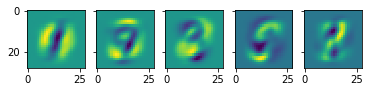

In [4]:
# Plot the first 5 PCs
nPC = 5
fig, ax = plt.subplots(nrows=1, ncols=nPC, sharex=True, sharey=True, )
for i in range(nPC):
    img = pca.components_[i].reshape(28,28)
    ax[i].imshow(img, interpolation='nearest')

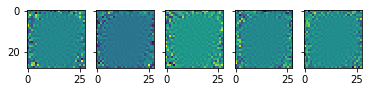

In [5]:
# Plot the last 5 PCs
nPC = 5
fig, ax = plt.subplots(nrows=1, ncols=nPC, sharex=True, sharey=True, )
for i in range(nPC):
    img = pca.components_[783-i].reshape(28,28)
    ax[i].imshow(img, interpolation='nearest')

Text(0, 0.5, 'Eigenvalue')

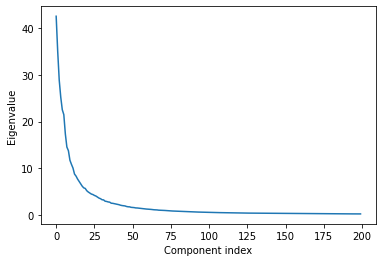

In [6]:
# Plot the eigenvalue against the component index
plt.plot(pca.explained_variance_[0:200])
plt.xlabel('Component index')
plt.ylabel('Eigenvalue')

In [7]:
# Perform PCA with nPC principal components. You should try varying nPC
nPC = 10
pca = PCA(n_components=nPC)
pca.fit(train_data)
X = np.copy(test_data)           # Deep copy
np.random.shuffle(X)             # Shuffle the digits
print(X.shape)
Y = pca.transform(X)
print(Y.shape)
Xhat = pca.inverse_transform(Y)  # Reconstruction

(10000, 784)
(10000, 10)


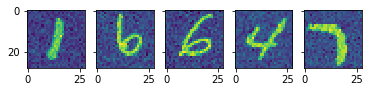

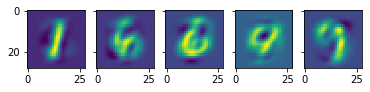

In [8]:
# Plot the original and reconstructed digits
fig, ax = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, )
for i in range(5):
    img = X[i].reshape(28,28)
    ax[i].imshow(img, interpolation='nearest')
fig, ax = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, )
for i in range(5):
    img = Xhat[i].reshape(28,28)
    ax[i].imshow(img, interpolation='nearest')

<font color='blue'>Plot the projected vectors in Y on the first 3 PCs</font>

In [9]:
import scipy.io
data = scipy.io.loadmat('../../lab1/data/noisy_train_digits.mat') 

/var/folders/l_/qy_y79ld7xg0h7dq_vxb40f00000gn/T/ipykernel_54931/3624713011.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-140, azim=100)


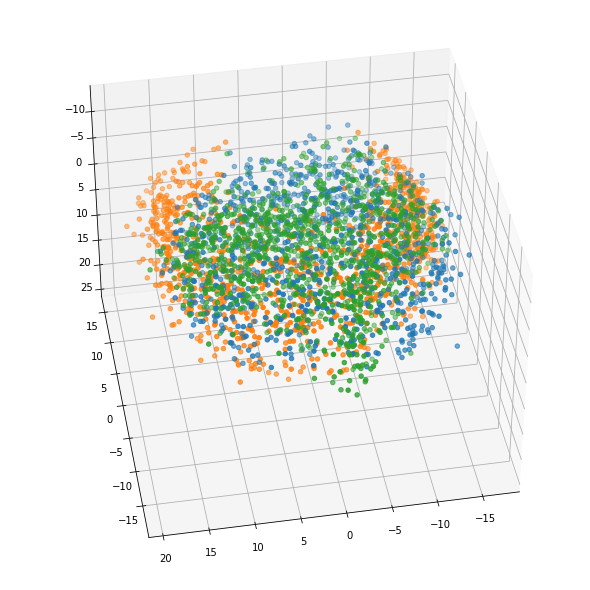

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, elev=-140, azim=100)

# Perform PCA with 3 components
pca = PCA(n_components=3)

# Reduce the dimensions of the numbers 0, 1, and 2
data_0 = pca.fit_transform(data['trainData'][0][0])
data_1 = pca.fit_transform(data['trainData'][1][0])
data_2 = pca.fit_transform(data['trainData'][2][0])
  
ax.scatter(data_0[0:1000,0],data_0[0:1000,1],data_0[0:1000,2])
ax.scatter(data_1[0:1000,0],data_1[0:1000,1],data_1[0:1000,2])
ax.scatter(data_2[0:1000,0],data_2[0:1000,1],data_2[0:1000,2])

plt.show()